In [ ]:
#Importamos las librerías para pre-procesar el set de datos
import tensorflow as tf 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


El set de datos que vamos a utilizar es el conocido Iris Dataset. Vamos a cargar dos dataframes, el de entrenamiento y el de testeo.
Las columnas serán 5: Sepal Length, Sepal Width, Petal Length, Petal Width y Species. 
La columna de Species será la columna que debemos predecir, y tomará los valores: Setosa, Versicolor o Virginica (0,1,2).

In [ ]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Species']
X_columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
Y_column = ['Species']
species = ['Setosa', 'Versicolor', 'Virginica']

In [ ]:
df_train = pd.read_csv(train_path, names=column_names, header=0)
df_test = pd.read_csv(test_path, names=column_names, header=0)


In [ ]:
df_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
#Vamos a separar el set de datos en X e Y. 

X_train= df_train[X_columns]
Y_train= df_train[Y_column]

X_test = df_test[X_columns]
Y_test = df_test[Y_column]

print(X_train.shape)
print(X_test.shape)



(120, 1)
(30, 4)


Species
2          42
0          42
1          36
dtype: int64

Vamos a visualizar los datos con un plot básico simplemente para ver la distribución de categorías. Esto es importante ya que nuestro modelo debe ser entrenado con un número de datos similar en cada categoría para evitar el overfitting, es decir, que se sobre-entrene para una determinada categoría y como consecuencia nos ofrezca resultados pobres a la hora de hacer predicciones.

Species
2          42
0          42
1          36
dtype: int64
Species
1          14
2           8
0           8
dtype: int64


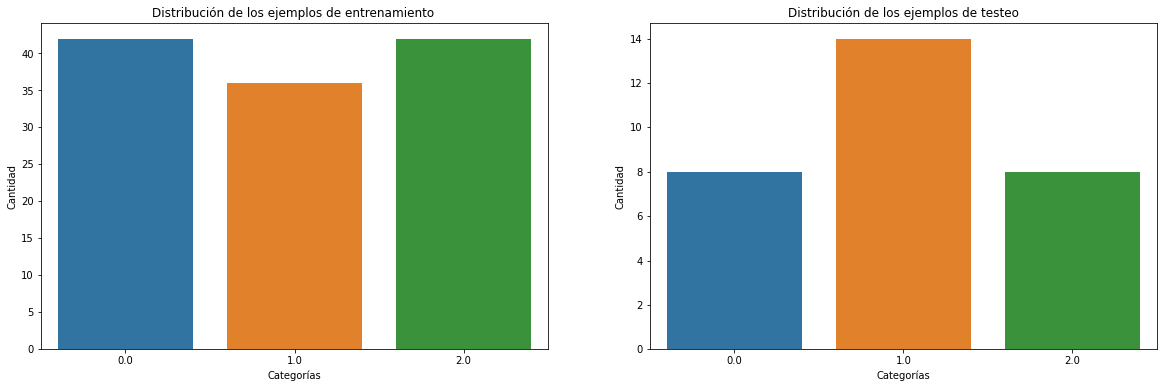

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20,6)) 
# Plot del set de entrenamiento
sns.countplot(Y_train.to_numpy(dtype=np.float64).reshape(-1), ax=axes[0]) #Convertimos el DF en un array numpy con dtype float.
axes[0].set_title('Distribución de los ejemplos de entrenamiento ')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Cantidad')
# Plot del set de testeo
sns.countplot(Y_test.to_numpy(dtype=np.float64).reshape(-1), ax=axes[1])
axes[1].set_title('Distribución de los ejemplos de testeo')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Cantidad')

print(Y_train.value_counts())
print(Y_test.value_counts())

A continuación podremos definir nuestro modelo. Pero antes, debemos pre-procesar las categorías de las especies y aplicar OneHotEncoding. Esto se puede hacer automáticamente con keras. 
Lo que queremos hacer es pasar de la siguiente representación: \\
[0, 1, 2]  \\
a la representación \\
[ [1, 0, 0], [0, 1, 0], [0, 0, 1] ] \\

Así tendremos una representación binaria.

In [ ]:
Y_train_OH = keras.utils.to_categorical(Y_train,num_classes = 3)
Y_test_OH = keras.utils.to_categorical(Y_test, num_classes= 3) 

In [ ]:
#Ahora definimos nuestro modelo a través de keras
model = Sequential([
                    Dense(64, input_shape=X_train.shape[1:],activation='relu'), #Primera capa con 64 neuronas
                    Dropout(0.25), #Desactivamos neuronas arbitrariamente
                    Dense(32, activation='relu'), #Capa con 32 neuronas
                    Dropout(0.25),
                    Dense(16, activation='relu'), #Capa con 16 neuronas
                    Dropout(0.25),
                    Dense(units=3 ,activation='softmax') #Capa de salida con activación Softmax. En este caso hago explícito el units para 
                                                          #concretar que son 3 categorías.
])

In [ ]:
#Seleccionamos un método para optimizar. Escogeré el optimizador Adam pero hay otras alternativas como el SGD o el RMS
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="CategoricalCrossentropy", metrics=['accuracy']) 

In [ ]:
train_NN = model.fit(X_train, Y_train_OH, batch_size=32, epochs=150, shuffle=True)

Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 1.7364 - accuracy: 0.2896
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1980 - accuracy: 0.4098
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 1.2135 - accuracy: 0.3619
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0520 - accuracy: 0.4756
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1209 - accuracy: 0.4721
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0352 - accuracy: 0.5121
Epoch 7/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9520 - accuracy: 0.5277
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0120 - accuracy: 0.5104
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8862 - accuracy: 0.6467
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.8918 - accuracy: 0.5825
Epoch 11/150
4/4 [===========

In [ ]:
#Vamos a hacer las predicciones y convertimos las predicciones binarias a categóricas
Y_pred = model.predict(X_test)
Y_pred_categories = np.argmax(Y_pred, axis=-1)

In [ ]:
scores = model.evaluate(X_test, Y_test_OH)
print(scores[0])
print(scores[1])

1/1 [==============================] - 0s 17ms/step - loss: 0.0962 - accuracy: 0.9667
0.0961693748831749
0.9666666388511658


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, Y_pred_categories))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

